Youtube channel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
% matplotlib inline

In [2]:
my_df = pd.read_csv("USvideos.csv")

In [3]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
5x1FAiIq_pQ,2017-11-09,15:49:21
htvR_dBs3eg,2017-11-10,21:38:57
vd4zwINEcLY,2011-03-27,04:31:25
7fm7mll2qvg,2017-11-10,00:00:00
q-WipZ9p0wk,2017-11-09,14:00:08


In [ ]:
my_df.sort_values(by = ['views'])

In [ ]:
# channels = 
my_df['channel_title'].value_counts()

In [ ]:
channels

In [ ]:
my_df.info()

In [ ]:
# corr_gb = gb_vid_df.loc[:,['views', 'likes', 'dislikes', 'comments']].corr()
corr_us = my_df.loc[:,['views', 'likes', 'dislikes', 'comments']].corr()

mask = np.zeros_like(corr_us, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 1, width_ratios=[1,1])
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# ax1 = plt.subplot(gs[0,0])
# ax1 = sns.heatmap(corr_gb, cmap=cmap, vmax=1, center=0.5,
#             square=True, linewidths=.5, mask=mask)
# ax1.set_title('Correlation matrix (GB)', fontsize=20)
# plt.yticks(rotation=0)

ax2 = plt.subplot(gs[0,0])
ax1 = sns.heatmap(corr_us, cmap=cmap, vmax=1, center=0.5,
                  square=True, linewidths=.5, mask=mask)
ax2.set_title('Correlation matrix (US)', fontsize=20)
plt.yticks(rotation=0)

plt.show()

AttributeError: Unknown property labelsize

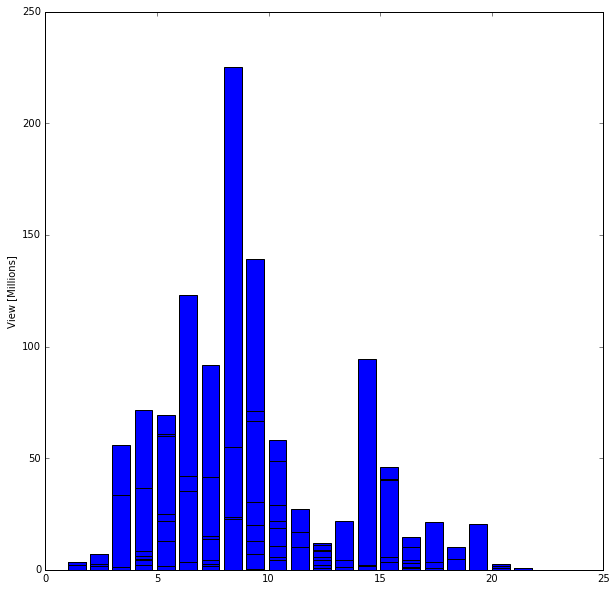

In [8]:
my_df['count_word']=my_df["title"].apply(lambda x: len(str(x).split()))
plt.figure(figsize = (10, 10))
plt.bar(my_df['count_word'],my_df['views']/1000000.)
plt.ylabel('View [Millions]',labelsize=16)
plt.xlabel('Number of words in the title', labelsize=16)
plt.show()

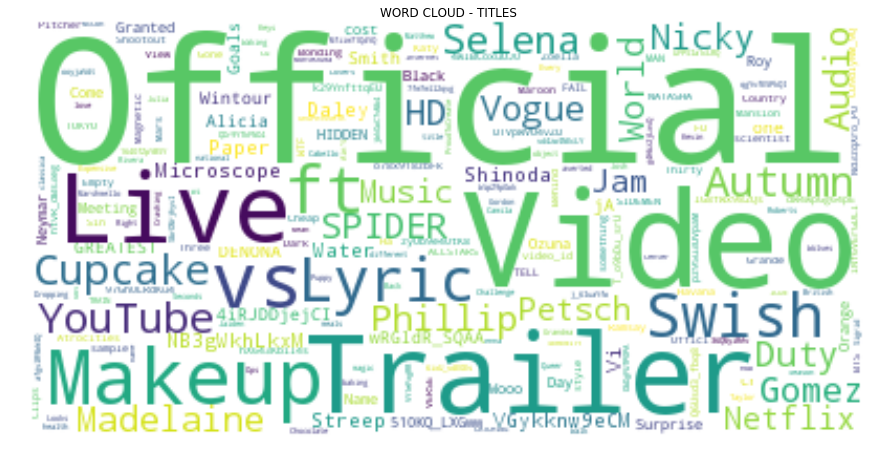

In [5]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                         background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(my_df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()